In [220]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [221]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"
# Read csv files
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [222]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [223]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [224]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [225]:
total_rides = pyber_data_df.count()
total_rides

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

## Technical Analysis Deliverable 1: A Summary DataFrame

### Create a summary DataFrame that showchases the following for each city type:
- Total Rides
- Total Drivers
- Totoal Fares
- Average Fare per Ride
- Average Fare per Driver

#### 1. Use the merge DataFrame to get the total rides, total drivers, and total fares for each city type using groupby() function on the city type 

In [226]:
# Get total rides for each city type
total_rides = pyber_data_df.groupby(pyber_data_df["type"]).count()["ride_id"]
# Get the total drivers for each city type
total_drivers = city_data_df.groupby(city_data_df["type"]).sum()["driver_count"]
# Get the total fares for each city type
total_fares = pyber_data_df.groupby(pyber_data_df["type"]).sum()["fare"]

#### 2. Calculate the average fare per ride and the average fare per driver for each city type.

In [227]:
# Calculate average fare per ride
avg_fare_per_ride = total_fares / total_rides
# Calculate average far per driver
avg_fare_per_driver = total_fares / total_drivers

In [228]:
# Create a summary Dataframe
PyBer_summary_df = pd.DataFrame({'Total Rides': total_rides.map('{:,.0f}'.format),
                                'Total Drivers': total_drivers.map('{:,.0f}'.format),
                                'Total Fares': total_fares.map('${:,.2f}'.format),
                                'Average Fare per Ride': avg_fare_per_ride.map('${:,.2f}'.format),
                                'Average Fare per Driver':avg_fare_per_driver.map('${:,.2f}'.format)})
PyBer_summary_df.index.name = None
PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Technical Analysis Deliverable 2: Multiple-Line Plot for the Sum of the Fares for Each City Type

#### 1. Rename columns

In [229]:
new_pyber_data_df = pyber_data_df.rename(columns = {'city': 'City', 'date':'Date',
                    'fare':'Fare', 'ride_id': 'Ride Id',
                    'driver_count': 'No. Drivers', 
                    'type':'City Type'})

#### 2. Set the index to the Date column

In [230]:
final_pyber_data_df = new_pyber_data_df.set_index('Date')

#### 3. Create a new DataFrame for fares include "City Type" and "Fare" columns using the copy() method on the merged DataFrame.

In [231]:
fare_pyber_data_df = final_pyber_data_df.copy().drop(columns=['City', 'Ride Id', 'No. Drivers'])

#### 4. Set the index to the datetime data type.

In [232]:
new_fare_pyber_data_df = fare_pyber_data_df.index.astype('datetime64[ns]')
fare_pyber_data_df.index = pd.Index(new_fare_pyber_data_df)
fare_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fare       2375 non-null   float64
 1   City Type  2375 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


#### 5. Calculate the sum() of fare by the type of city and date using groupby() to create a Series

In [233]:
sum_of_fares_series = fare_pyber_data_df.groupby(['Date', 'City Type']).sum()

#### 6. Convert the groupby Series into a DataFrame

In [234]:
fare_pyber_df = sum_of_fares_series.reset_index()
fare_pyber_df

,Date,City Type,Fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


#### 7. Reset the index, the create a pivot table DataFrame with the Date as the index and columns = 'City Type'. The Fare for each Date should appear in each row.

In [235]:
# Create pivot table
pivot_fare_df = pd.pivot_table(fare_pyber_df, index='Date', values='Fare',columns='City Type', aggfunc=np.sum)
pivot_fare_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


#### 8. Create a new DataFame from the pivot table DataFrame on the given dates, '2019-01-01':'2019-04-28', using loc.

In [237]:
 Jan_Apr_fare_df = pivot_fare_df.loc['2019-01-01':'2019-04-28']

#### 9. Create a new DataFrame by setting the DataFrame you created in Step 8 with resample() in weekly bins, and calculate the sum() of the fares for each week in the resampled data.

In [244]:
weekly_fare_df = Jan_Apr_fare_df.resample('W-MON').sum()

#### 10. Using the object-oriented interface method, plot the DataFrame you created in Step 9 using the df.plot() function. Things to consider with your plotting:
- Import the style from Matplotlib.
- Use the FiveThirtyEight (Links to an external site.) graph style.
- Add a title.
- Add x- and y-axis labels according to the final figure.
- Save the figure to the “analysis” folder.
- Make the figure size large enough so it’s not too small.

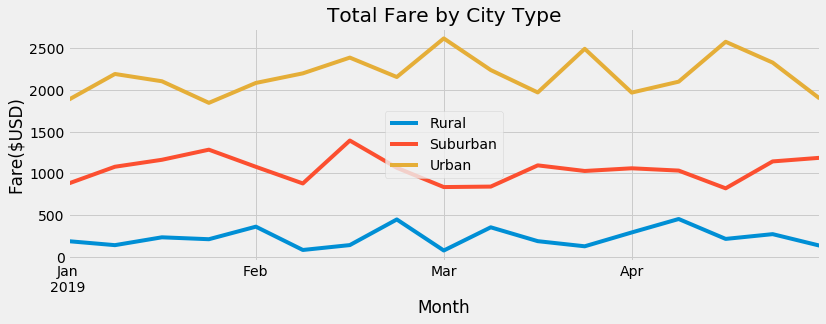

In [251]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(12,4))
weekly_fare_df.plot(ax=ax)

ax.set_title('Total Fare by City Type')
ax.set_xlabel('Month')
ax.set_ylabel('Fare($USD)')
ax.legend(loc='center')
plt.savefig('analysis/Challenge_Fig.png')
plt.show()